In [112]:
%matplotlib inline

import pandas as pd
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pymysql.cursors
import scipy.stats as stats
import pylab as pylab

plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

In [113]:
connecter = pymysql.connect(host='localhost',
                             user='matsumoto',
                             password='ud0nud0n',
                             db='matsumoto',
                             charset='utf8')

In [115]:
sql = "select id, date, sold_or_not, cost, required_time from MERCARI_DATA2"
df = psql.read_sql(sql, connecter)

In [118]:
df[df.sold_or_not=="NO"].count()

id               2417
date             2417
sold_or_not      2417
cost             2417
required_time    2417
dtype: int64

/home/matsumoto/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


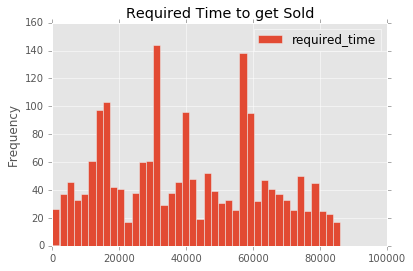

In [110]:
df[df.required_time >= 10][df.required_time <= 100000].plot( y=['required_time'], bins=40, kind='hist', xlim = [0, 100000], title = "Required Time to get Sold")

In [71]:
df[df.required_time >= 82800]

id                date      brand_name   cost  required_time
928    m142332294 2016-12-20 04:00:17        no brand   4200          82857
1263   m157800717 2016-12-15 05:44:28        no brand   7400          84809
1707   m179040156 2016-12-16 11:31:28    \nコムデギャルソン\n   7000          82893
1933   m188498755 2016-12-16 21:59:27       \nネペンテス\n   4000          83404
2879   m230427833 2016-12-17 23:27:22          \nリー\n   9000          83908
3165   m243754682 2016-12-20 01:24:24       \nテットオム\n   3500          84633
4069   m283106174 2016-12-18 20:22:57        no brand   2300          84378
4117   m285580711 2016-12-18 22:59:11        no brand   2500          85273
4575   m306755240 2016-12-20 00:57:20          \nリー\n   3000          82881
5030   m328961914 2016-12-18 22:59:41        no brand   5000          85277
5664   m354325188 2016-12-20 12:34:43     \nナノユニバース\n  18000          83769
5748   m358311482 2016-12-16 03:12:05        no brand   6000          84221
6641   m396168560 2016-12-15 05:44:15      \nレイビームス\n  16400          84806
7074   m414828449 2016-12-20 12:45:31        \nユニクロ\n   1400          83695
8906   m500619507 2016-12-19 17:44:07         \nニコル\n   2780          85299
11096  m600501618 2016-12-17 23:22:26      \nアーペーセー\n   3033          84291
11652  m626154607 2016-12-16 02:09:35        no brand  11000          85828
12774  m675719718 2016-12-17 20:50:16        no brand   1155          83977
13480  m708625080 2016-12-16 11:35:07        no brand   3000          82941
15600  m802944984 2016-12-20 12:33:53       \nパタゴニア\n  15800          83783
15758  m810494787 2016-12-19 22:59:14          \nザラ\n   5000          85791
16281  m833319758 2016-12-17 12:11:24  \nユナイテッドアローズ\n   1555          85253
17204  m872597446 2016-12-20 00:42:03          \nザラ\n   3200          84126
17219  m873463082 2016-12-20 12:34:33        \nエーグル\n  14500          83764
17610  m891793253 2016-12-17 21:03:07      \nタケオキクチ\n   1890          83932
17645  m892925728 2016-12-16 11:31:35       \nガンリュウ\n   7000          82897
18591  m936538476 2016-12-20 03:03:21    \nイヴサンローラン\n   9000          85646
18660  m939434990 2016-12-16 02:05:33        no brand   7000          85949
18667  m939708078 2016-12-17 16:20:56        no brand  19800          83346
18979  m952992956 2016-12-19 22:59:38   \nディースクエアード\n  25000          85794

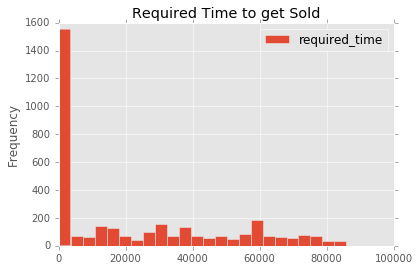

In [111]:
df.plot( y=['required_time'], bins=24, kind='hist', xlim = [0, 100000], title = "Required Time to get Sold")

((array([-3.38311996, -3.13142722, -2.99178447, ...,  2.99178447,
          3.13142722,  3.38311996]),
  array([   65,   222,   235, ..., 85794, 85828, 85949])),
 (22163.482640580391, 40114.449327818002, 0.98137238660829162))

/home/matsumoto/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


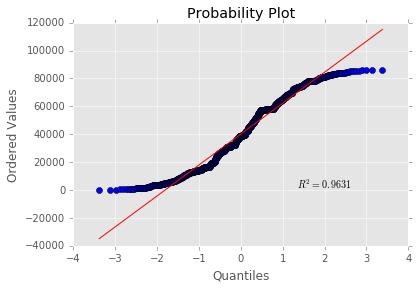

In [106]:
stats.probplot(df['required_time'][df.required_time >= 10], dist="norm", plot=pylab)

In [109]:
stats.shapiro(df['required_time'][df.required_time >= 10])

(0.9621227383613586, 4.430292321077178e-22)